Assignment 2, Notebook Link https://colab.research.google.com/drive/17OdpJPOvPIe9XWj8hpsas3FROKsIDuwA?usp=sharing

Imports and opening File in read mode.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"titanic_train.csv")

Now first we clean and preprocess data so that we have Uniform data for EDA.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First Checking How much data is missing(Nan)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As Number of Cabin data missing is very high, we will ignore that column. We will fill Embarked with either family data or mode.

In [ ]:
df.groupby('Embarked').PassengerId.nunique()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

First Seperating Name into Title, First Name, Last Name and Middle name.

In [ ]:
df[['Last_name', 'Name']] = df['Name'].str.split(',', expand=True)
df[['Title', 'Name']] = df['Name'].str.split(".", n=1,expand=True)
df[['First_name', 'Middle_name']] = df['Name'].str.split(" ", n=1,expand=True)
df[['First_name', 'Middle_name']] = df['Middle_name'].str.split(" ", n=1,expand=True)
df[['Alias', 'Middle_name']] = df['Middle_name'].str.split(" ", n=1,expand=True)
df.groupby('Last_name').PassengerId.nunique()

Last_name
Abbing           1
Abbott           2
Abelson          2
Adahl            1
Adams            1
                ..
de Mulder        1
de Pelsmaeker    1
del Carlo        1
van Billiard     1
van Melkebeke    1
Name: PassengerId, Length: 667, dtype: int64

Checking if Missing Embarked Value have Family or Siblings

In [ ]:
rslt_df = df.Last_name[df['Embarked'].isna()]
print('\nResult dataframe :\n', rslt_df)
rslt_df = df.Embarked[df['Last_name'] == 'Icard']
print('\nResult dataframe :\n', rslt_df)
rslt_df = df.Embarked[df['Last_name'] == 'Stone']
print('\nResult dataframe :\n', rslt_df)


Result dataframe :
 61     Icard
829    Stone
Name: Last_name, dtype: object

Result dataframe :
 61    NaN
Name: Embarked, dtype: object

Result dataframe :
 829    NaN
Name: Embarked, dtype: object


As There are no Family members of people who have missing Embarked values, we will fill it with mode.

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Filling the missing Age on basis of Means of PClass, Title and Gender

In [ ]:
[df['Age'].fillna(df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [df]]

[None]

Converting Age into Integer type for cleaner Data

In [ ]:
df['Age'] = df['Age'].astype(int)

We can also check if a passenger was travelling alone or not.

In [ ]:
df['Isalone']=1
df.loc[df['SibSp'] != 0 , 'Isalone'] = 0
df.loc[df['Parch'] != 0 , 'Isalone'] = 0

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Isalone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292929,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,13.542631,1.102743,0.806057,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Last_name    891 non-null    object 
 13  Title        891 non-null    object 
 14  First_name   891 non-null    object 
 15  Middle_name  188 non-null    object 
 16  Alias        576 non-null    object 
 17  Isalone      891 non-null    int64  
dtypes: float64(1), int64(7), object(10)
memory usage: 

Now the Data looks Better, so we can move to EDA.

In [ ]:
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
categorical_features = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Last_name','Title','Isalone']
for feature in categorical_features:
    dfplt = df.copy(deep=True)
    dfplt["Survived"] = dfplt["Survived"].astype(str)
    fig = px.histogram(dfplt, x=feature,color="Survived")
    fig.show()

In [ ]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Title",color="Survived")
fig.show()

In [ ]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Pclass",color="Survived")
fig.show()

In [ ]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Sex",color="Survived")
fig.show()

In [ ]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Fare",color="Survived")
fig.show()

In [ ]:
dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Last_name",color="Survived")
fig.show()

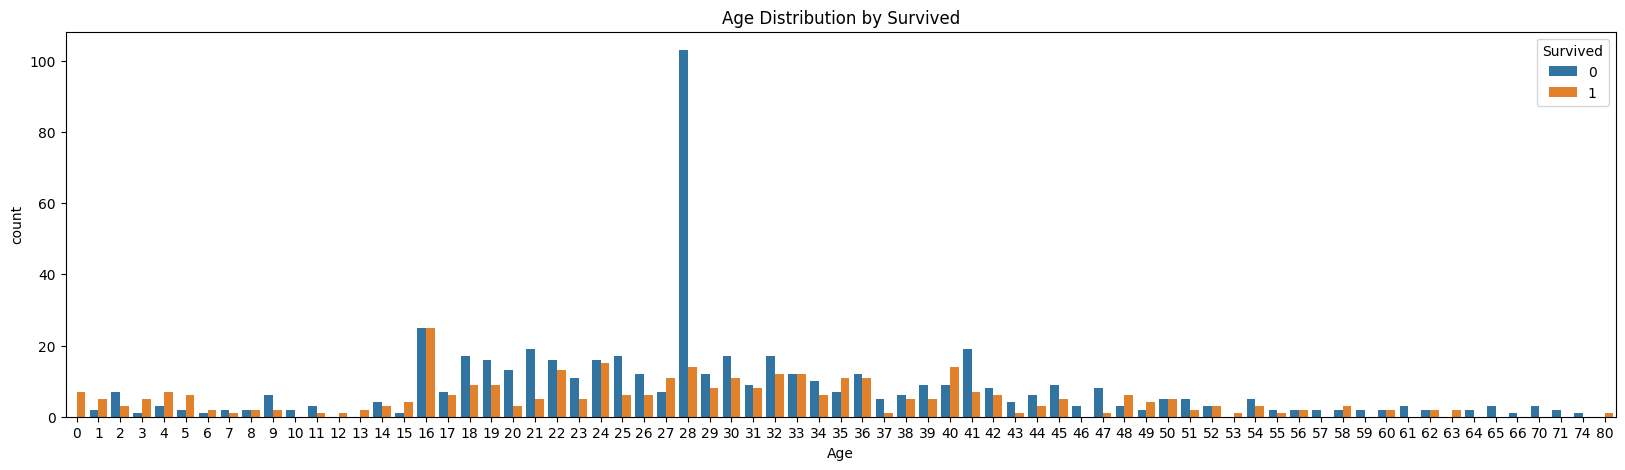

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Age', hue='Survived', data=df)
plt.title('Age Distribution by Survived')
plt.show()

From Above two graphs, we can see that People with Title as "Mr." and Age 28 are more likely to not Survive. Also Title "Miss" and "Mrs" have higher chance of surviving.

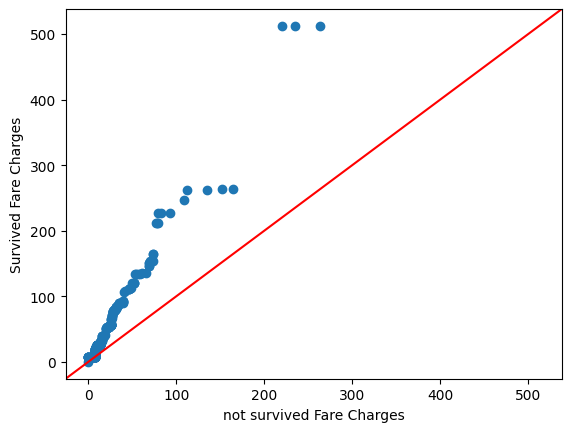

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples

x = df[df['Survived']==0]['Fare']
y = df[df['Survived']==1]['Fare']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y,xlabel="not survived Fare Charges",ylabel="Survived Fare Charges",line='45')
plt.show()

From Above QQ plot, we can see that People who have survived have spent more.

In [ ]:
corr = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Isalone']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-135-19ab2fd7589f>:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Survived,Pclass,Age,SibSp,Parch,Fare,Isalone
Survived,1.00,-0.34,-0.07,-0.04,0.08,0.26,-0.20
Pclass,-0.34,1.00,-0.41,0.08,0.02,-0.55,0.14
Age,-0.07,-0.41,1.00,-0.27,-0.19,0.12,0.19
SibSp,-0.04,0.08,-0.27,1.00,0.41,0.16,-0.58
Parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.58
Fare,0.26,-0.55,0.12,0.16,0.22,1.00,-0.27
Isalone,-0.20,0.14,0.19,-0.58,-0.58,-0.27,1.00


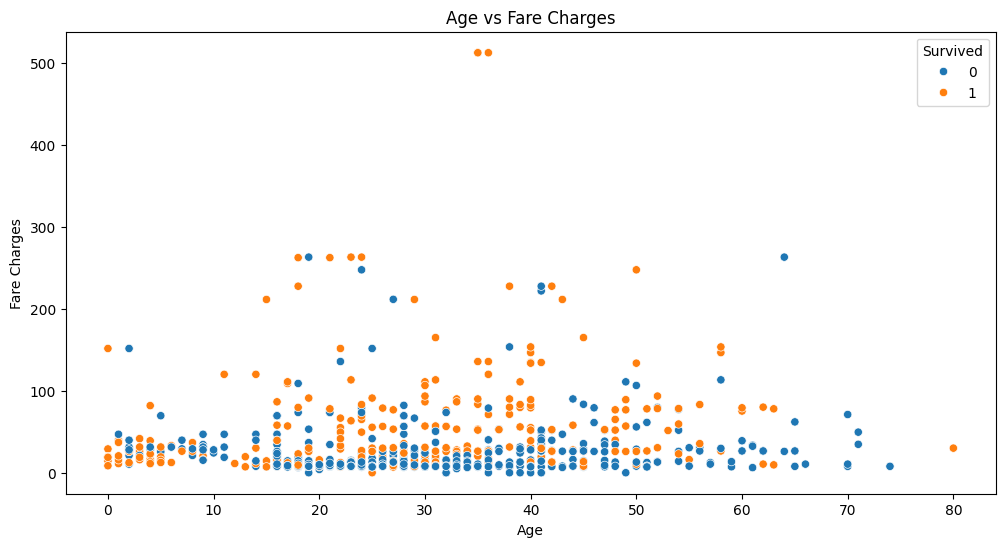

In [ ]:
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Age', y='Fare', data=df,hue='Survived')
scatter.set_title('Age vs Fare Charges')
scatter.set_xlabel('Age')
scatter.set_ylabel('Fare Charges')
#plt.yscale('log')
plt.show()

We can see in above graph that lower aged people are more likely to survive and Fare has more impact on Survival than Age.

Exit